In [32]:
import os
import numpy as np
import torch
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import shutil

In [4]:
''' SET THE DEVICE '''
device = 'mps' if torch.mps.is_available() else 'cpu'
device = 'cuda' if torch.cuda.is_available() else device
print(f"Using device: {device}")

Using device: mps


In [3]:
import kagglehub
''' UNCOMMENT THE FOLLOWING LINES TO DOWNLOAD DATASET '''
#path = kagglehub.dataset_download('mostafaabla/garbage-classification')
#print('path to dataset files', path)

/Users/kazikgarstecki/Desktop/Y2S2/as_project/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


' UNCOMMENT THE FOLLOWING LINES TO DOWNLOAD DATASET '

In [5]:
dir_path = os.path.join(os.getcwd(), 'data/garbage_classification/')

print('All catgories of garbage classification dataset')
print('----------------------------------------------------')
for file in os.listdir(dir_path):
    print(file)

All catgories of garbage classification dataset
----------------------------------------------------
paper
green-glass
clothes
metal
cardboard
trash
biological
white-glass
battery
brown-glass
plastic
shoes


In [25]:
data_dict = {directory_name: [] for directory_name in os.listdir(dir_path)}

data_path = Path('data/garbage_classification/')

categories_to_include = [
    'cardboard',
    'green-glass',
    'white-glass',
    'brown-glass',
    'metal',
    'paper',
    'plastic',
    'trash',
    'biological'
]

for category_name in data_dict.keys():
    if category_name in categories_to_include:
        image_dir = data_path / category_name
        for image in tqdm(os.listdir(image_dir)):
            img = Image.open(image_dir / image)
            img = img.resize((512, 512))
            data_dict[category_name].append(img)

100%|██████████| 865/865 [00:02<00:00, 309.93it/s]


In [26]:
for category_name in os.listdir(Path('data/garbage_classification/')):
    if category_name not in categories_to_include:
        shutil.rmtree(data_path / category_name)
        print(f"Removed {category_name} directory and its contents.")
    else:
        print(len(os.listdir(data_path / category_name)), 'images in', category_name, 'directory')

1050 images in paper directory
629 images in green-glass directory
Removed clothes directory and its contents.
769 images in metal directory
891 images in cardboard directory
697 images in trash directory
985 images in biological directory
775 images in white-glass directory
Removed battery directory and its contents.
607 images in brown-glass directory
865 images in plastic directory
Removed shoes directory and its contents.


In [68]:
simple_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

In [72]:
train_test_dataset = Path('train_test_dataset/garbage_classification')
if not os.path.exists(train_test_dataset):
    os.makedirs(train_test_dataset)
    for train_test in ['train', 'test']:
        if not os.path.exists(train_test_dataset / train_test):
            os.makedirs(train_test_dataset / train_test)

In [73]:
for category_name in tqdm(categories_to_include):
    image_dir = data_path / category_name
    all_images = os.listdir(image_dir)
    img = Image.open(image_dir / all_images[0])
    train_images = random.sample(all_images, int(len(all_images) * 0.8))
    print('Number of images in category:', category_name, len(all_images))
    print(len(train_images), 'images in train set')
    test_images = list(set(all_images) - set(train_images))
    print(len(test_images), 'images in test set')
    for image in train_images:
        path_to_move = train_test_dataset/ 'train' / category_name
        if not os.path.exists(path_to_move):
            os.makedirs(path_to_move)
        img_path = image_dir / image
        shutil.copy(img_path, path_to_move)
    for image in test_images:
        path_to_move = train_test_dataset / 'test' / category_name
        if not os.path.exists(path_to_move):
            os.makedirs(path_to_move)
        img_path = image_dir / image
        shutil.copy(img_path, path_to_move)

  0%|          | 0/9 [00:00<?, ?it/s]

Number of images in category: cardboard 891
712 images in train set
179 images in test set


 11%|█         | 1/9 [00:02<00:20,  2.51s/it]

Number of images in category: green-glass 629
503 images in train set
126 images in test set


 22%|██▏       | 2/9 [00:04<00:15,  2.15s/it]

Number of images in category: white-glass 775
620 images in train set
155 images in test set


 33%|███▎      | 3/9 [00:06<00:11,  1.94s/it]

Number of images in category: brown-glass 607
485 images in train set
122 images in test set


 44%|████▍     | 4/9 [00:07<00:09,  1.91s/it]

Number of images in category: metal 769
615 images in train set
154 images in test set


 56%|█████▌    | 5/9 [00:08<00:05,  1.38s/it]

Number of images in category: paper 1050
840 images in train set
210 images in test set


 67%|██████▋   | 6/9 [00:08<00:03,  1.09s/it]

Number of images in category: plastic 865
692 images in train set
173 images in test set


 78%|███████▊  | 7/9 [00:10<00:02,  1.09s/it]

Number of images in category: trash 697
557 images in train set
140 images in test set


 89%|████████▉ | 8/9 [00:10<00:01,  1.02s/it]

Number of images in category: biological 985
788 images in train set
197 images in test set


100%|██████████| 9/9 [00:11<00:00,  1.27s/it]


In [74]:
for directory_name in os.listdir(Path('data/garbage_classification')):
    print(directory_name)
    print(len(os.listdir(train_test_dataset / 'train' / directory_name)))
    print(len(os.listdir(train_test_dataset / 'test' / directory_name)))

paper
840
210
green-glass
503
126
metal
615
154
cardboard
712
179
trash
557
140
biological
788
197
white-glass
620
155
brown-glass
485
122
plastic
692
173


In [75]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [76]:
train_dataset = datasets.ImageFolder(root = Path('train_test_dataset/garbage_classification/train'),
                                    transform=simple_transform,
                                    target_transform=None)
test_dataset = datasets.ImageFolder(root = Path('train_test_dataset/garbage_classification/test'),
                                    transform=simple_transform)

train_dataset, test_dataset

(Dataset ImageFolder
     Number of datapoints: 5812
     Root location: train_test_dataset/garbage_classification/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 1456
     Root location: train_test_dataset/garbage_classification/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [77]:
class_names = train_dataset.classes
class_names

['biological',
 'brown-glass',
 'cardboard',
 'green-glass',
 'metal',
 'paper',
 'plastic',
 'trash',
 'white-glass']

In [78]:
class_dict = train_dataset.class_to_idx
class_dict

{'biological': 0,
 'brown-glass': 1,
 'cardboard': 2,
 'green-glass': 3,
 'metal': 4,
 'paper': 5,
 'plastic': 6,
 'trash': 7,
 'white-glass': 8}

In [79]:
len(train_dataset), len(test_dataset)

(5812, 1456)

torch.Size([3, 64, 64])
torch.float32
biological


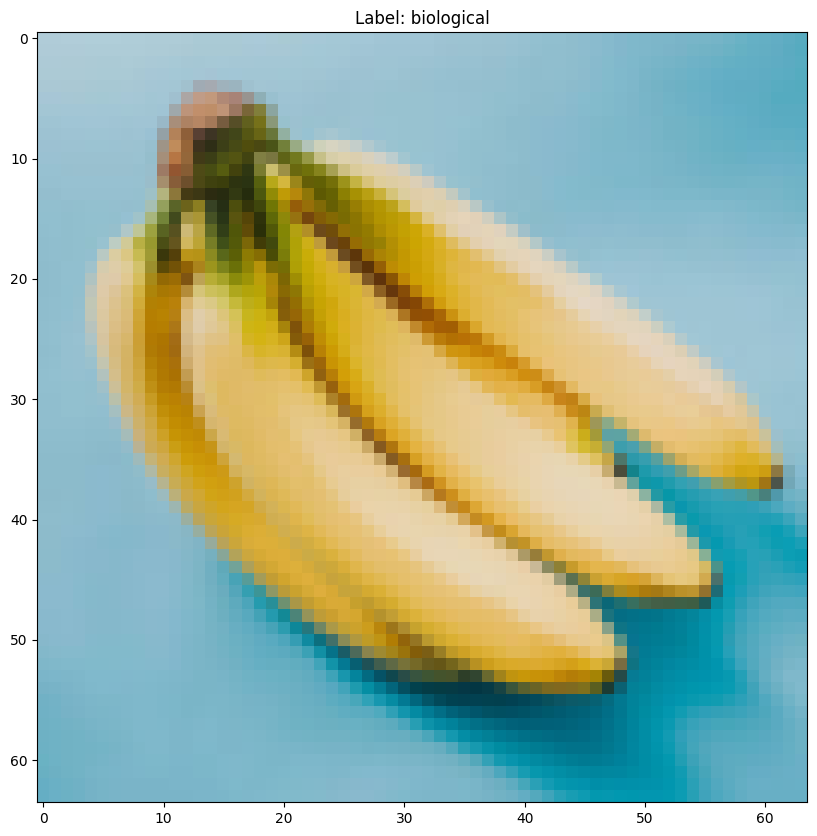

In [83]:
BATCH_SIZE = 32
train_dataloader = DataLoader(train_dataset, 
                          batch_size=BATCH_SIZE, shuffle=True,
                          num_workers=1)

test_dataloader = DataLoader(test_dataset,
                            batch_size=BATCH_SIZE, shuffle=False,
                            num_workers=1)

img, label = train_dataset[0][0], train_dataset[0][1]
plt.figure(figsize=(10, 10))
plt.imshow(img.permute(1, 2, 0))
plt.title(f"Label: {class_names[label]}")
print(img.shape)
print(img.dtype)
print(class_names[label])

In [85]:
print(len(train_dataloader), len(test_dataloader))

182 46
